In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/sample_submission.csv
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train.csv
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/83caa8a85e03606cf57e49147d7ac569.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/7550347fa2bb96c2354a3716dfa3a69c.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/74b23792db329cff5843e36efb8aa65a.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/94568a546be103177cb582d3e91cd2d8.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/6da36354fc904b63bc03eb3884e0c35c.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/5b3620a56668010877cfafa9322e18b5.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/5157d5c9b1f0004b29310652ea54e825.dicom
/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test/74897408dcbd69ef7c76cbbbbeb722d6.dicom
/kaggle/input/vi

In [4]:
base = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"

In [5]:
import os

file_path = base + "train.csv"
size_mb = os.path.getsize(file_path) / (1024*1024)
size_mb


4.435338973999023

In [6]:
import pandas as pd

base = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"

df_train = pd.read_csv(base + "train.csv")
df_sample = pd.read_csv(base + "sample_submission.csv")

print("Train shape:", df_train.shape)
df_train.head()

Train shape: (67914, 8)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


image_id          class_name  class_id rad_id  \
0  50a418190bc3fb1ef1633bf9678929b3          No finding        14    R11   
1  21a10246a5ec7af151081d0cd6d65dc9          No finding        14     R7   
2  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3    R10   
3  051132a778e61a86eb147c7c6f564dfe  Aortic enlargement         0    R10   
4  063319de25ce7edb9b1c6b8881290140          No finding        14    R10   

    x_min   y_min   x_max   y_max  
0     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN  
2   691.0  1375.0  1653.0  1831.0  
3  1264.0   743.0  1611.0  1019.0  
4     NaN     NaN     NaN     NaN

In [7]:
print("Train shape:", df_train.shape)
print("\nColumns:", df_train.columns)

df_train.info()
df_train.describe(include="all")

Train shape: (67914, 8)

Columns: Index(['image_id', 'class_name', 'class_id', 'rad_id', 'x_min', 'y_min',
       'x_max', 'y_max'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67914 entries, 0 to 67913
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_id    67914 non-null  object 
 1   class_name  67914 non-null  object 
 2   class_id    67914 non-null  int64  
 3   rad_id      67914 non-null  object 
 4   x_min       36096 non-null  float64
 5   y_min       36096 non-null  float64
 6   x_max       36096 non-null  float64
 7   y_max       36096 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 4.1+ MB


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


image_id  class_name      class_id rad_id  \
count                              67914       67914  67914.000000  67914   
unique                             15000          15           NaN     17   
top     03e6ecfa6f6fb33dfeac6ca4f9b459c9  No finding           NaN     R9   
freq                                  57       31818           NaN  15708   
mean                                 NaN         NaN      9.979312    NaN   
std                                  NaN         NaN      5.036494    NaN   
min                                  NaN         NaN      0.000000    NaN   
25%                                  NaN         NaN      7.000000    NaN   
50%                                  NaN         NaN     13.000000    NaN   
75%                                  NaN         NaN     14.000000    NaN   
max                                  NaN         NaN     14.000000    NaN   

               x_min         y_min         x_max         y_max  
count   36096.000000  36096.000000  36096.000000  36096.000000  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean     1051.332696   1065.262051   1492.269337   1456.660489  
std       565.838078    552.925133    595.384126    581.134138  
min         0.000000      0.000000     68.000000    103.000000  
25%       602.000000    627.000000   1010.000000   1009.000000  
50%      1014.500000    935.000000   1567.000000   1411.000000  
75%      1457.000000   1471.000000   1947.000000   1911.000000  
max      2934.000000   3133.000000   3131.000000   3384.000000

In [8]:
df_train['class_name'].value_counts()

class_name
No finding            31818
Aortic enlargement     7162
Cardiomegaly           5427
Pleural thickening     4842
Pulmonary fibrosis     4655
Nodule/Mass            2580
Lung Opacity           2483
Pleural effusion       2476
Other lesion           2203
Infiltration           1247
ILD                    1000
Calcification           960
Consolidation           556
Atelectasis             279
Pneumothorax            226
Name: count, dtype: int64

In [9]:
(df_train['class_name'] == "No finding").sum()

31818

In [10]:
df_train['image_id'].nunique()

15000

In [11]:
df_train.isna().sum()

image_id          0
class_name        0
class_id          0
rad_id            0
x_min         31818
y_min         31818
x_max         31818
y_max         31818
dtype: int64

In [12]:

#     IMPORT LIBRARIES

import os
import cv2
import pydicom
import numpy as np
import pandas as pd
import random
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import matplotlib.pyplot as plt

BASE = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"
TRAIN_DICOM = BASE + "train/"
TRAIN_CSV = BASE + "train.csv"

# Create output dirs
OUTPUT_DIR = "/kaggle/working/processed_images/"
os.makedirs(OUTPUT_DIR, exist_ok=True)
os.makedirs(OUTPUT_DIR + "images/", exist_ok=True)
os.makedirs(OUTPUT_DIR + "labels/", exist_ok=True)


In [13]:
df = pd.read_csv(TRAIN_CSV)

# for  1000 images
unique_imgs = df['image_id'].unique()[:1000]
df = df[df['image_id'].isin(unique_imgs)]

print("Processing images:", len(unique_imgs))

Processing images: 1000


In [14]:
def load_dicom(path):
    ds = pydicom.dcmread(path)
    img = ds.pixel_array.astype(np.float32)
    return img


In [15]:
def clahe(img):
    c = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return c.apply(img)

print(" clahe() function loaded.")

 clahe() function loaded.


In [16]:
def denoise(img):
    img = cv2.GaussianBlur(img, (3,3), 0)
    img = cv2.medianBlur(img, 3)
    return img

print("denoise() function loaded.")

denoise() function loaded.


In [17]:
def crop_borders(img, border=10):
    h, w = img.shape
    return img[border:h-border, border:w-border]

print(" crop_borders() function loaded.")

 crop_borders() function loaded.


In [18]:
def pad_to_square(img):
    h, w = img.shape
    size = max(h, w)
    padded = np.zeros((size, size), dtype=np.uint8)
    padded[:h, :w] = img
    return padded

print(" pad_to_square() function loaded.")

 pad_to_square() function loaded.


In [19]:
def resize(img, size=512):
    return cv2.resize(img, (size, size))

print(" resize() function loaded.")

 resize() function loaded.


In [20]:
def convert_to_yolo(box, img_w, img_h):
    x_min, y_min, x_max, y_max = box

    w = x_max - x_min
    h = y_max - y_min
    xc = x_min + w/2
    yc = y_min + h/2

    return [
        0,                # class_id
        xc / img_w,       # x_center
        yc / img_h,       # y_center
        w / img_w,        # width
        h / img_h         # height
    ]

print(" convert_to_yolo() function loaded.")

 convert_to_yolo() function loaded.


In [21]:
import pandas as pd

TRAIN_CSV = BASE + "train.csv"   # or your correct path
df_train = pd.read_csv(TRAIN_CSV)

print(" df_train loaded successfully!")
print(df_train.head())

 df_train loaded successfully!
                           image_id          class_name  class_id rad_id  \
0  50a418190bc3fb1ef1633bf9678929b3          No finding        14    R11   
1  21a10246a5ec7af151081d0cd6d65dc9          No finding        14     R7   
2  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3    R10   
3  051132a778e61a86eb147c7c6f564dfe  Aortic enlargement         0    R10   
4  063319de25ce7edb9b1c6b8881290140          No finding        14    R10   

    x_min   y_min   x_max   y_max  
0     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN  
2   691.0  1375.0  1653.0  1831.0  
3  1264.0   743.0  1611.0  1019.0  
4     NaN     NaN     NaN     NaN  


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


In [22]:
df_train.columns

Index(['image_id', 'class_name', 'class_id', 'rad_id', 'x_min', 'y_min',
       'x_max', 'y_max'],
      dtype='object')

In [23]:
def get_image_size(image_id):
    dicom_path = os.path.join(BASE + "train/", image_id + ".dicom")
    d = pydicom.dcmread(dicom_path)
    h, w = d.pixel_array.shape
    return w, h

In [24]:
df_train.columns.tolist()

['image_id',
 'class_name',
 'class_id',
 'rad_id',
 'x_min',
 'y_min',
 'x_max',
 'y_max']

In [25]:
import os
import cv2
import pydicom
import numpy as np
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt

BASE = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"
train_path = BASE + "train/"

In [26]:
df_train = pd.read_csv(BASE + "train.csv")
df_train.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


image_id          class_name  class_id rad_id  \
0  50a418190bc3fb1ef1633bf9678929b3          No finding        14    R11   
1  21a10246a5ec7af151081d0cd6d65dc9          No finding        14     R7   
2  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3    R10   
3  051132a778e61a86eb147c7c6f564dfe  Aortic enlargement         0    R10   
4  063319de25ce7edb9b1c6b8881290140          No finding        14    R10   

    x_min   y_min   x_max   y_max  
0     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN  
2   691.0  1375.0  1653.0  1831.0  
3  1264.0   743.0  1611.0  1019.0  
4     NaN     NaN     NaN     NaN

In [27]:
def get_image_size(image_id):
    dicom_path = os.path.join(train_path, image_id + ".dicom")
    d = pydicom.dcmread(dicom_path)
    arr = d.pixel_array
    h, w = arr.shape
    return w, h

In [28]:
def convert_to_yolo(box, img_w, img_h):
    x_min, y_min, x_max, y_max = box

    w = x_max - x_min
    h = y_max - y_min
    xc = x_min + w / 2
    yc = y_min + h / 2

    return [
        0,               # class_id (set to 0 for now)
        xc / img_w,
        yc / img_h,
        w / img_w,
        h / img_h
    ]

In [29]:
# 1. Load DICOM
def load_dicom(path):
    d = pydicom.dcmread(path)
    img = d.pixel_array.astype(float)
    return img

# 2. Min-Max Normalize
def normalize(img):
    img = (img - img.min()) / (img.max() - img.min() + 1e-8)
    return (img * 255).astype("uint8")

# 3. CLAHE
def apply_clahe(img):
    c = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return c.apply(img)

# 4. Light Denoising
def denoise(img):
    img = cv2.GaussianBlur(img, (3,3), 0)
    img = cv2.medianBlur(img, 3)
    return img

# 5. Crop borders
def crop_borders(img, border=10):
    h, w = img.shape
    return img[border:h-border, border:w-border]
# 6. Pad to square
def pad_to_square(img):
    h, w = img.shape
    size = max(h, w)
    canvas = np.zeros((size, size), dtype=np.uint8)
    canvas[:h, :w] = img
    return canvas

# 7. Resize
def resize(img, size=512):
    return cv2.resize(img, (size, size))

# Combine all preprocessing
def preprocess_image(path):
    img = load_dicom(path)
    img = normalize(img)
    img = apply_clahe(img)
    img = denoise(img)
    img = crop_borders(img)
    img = pad_to_square(img)
    img = resize(img)
    return img

In [30]:
SAVE_DIR = "/kaggle/working/preprocessed/"
IMG_DIR = SAVE_DIR + "images/"
LBL_DIR = SAVE_DIR + "labels/"

os.makedirs(IMG_DIR, exist_ok=True)
os.makedirs(LBL_DIR, exist_ok=True)

print("Save paths ready.")

Save paths ready.


In [34]:
   !pip install ultralytics

  Using cached ultralytics-8.3.235-py3-none-any.whl.metadata (37 kB)
  Using cached ultralytics_thop-2.0.18-py3-none-any.whl.metadata (14 kB)
  Using cached numpy-2.2.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.4.127-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-9.1.0.70-py3-none-manylinux2014_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.4.5.8-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.2.1.3-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.5.147-py3-none-manylinux2014_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.6.1.9-py3-none-manylinux2014_x86_64.w

In [36]:
import os

base_path = "/kaggle/working/preprocessed"

# Define all required folders
folders = [
    "images",
    "labels",
    "images/train",
    "images/val",
    "labels/train",
    "labels/val"
]

# Create folders
for folder in folders:
    path = os.path.join(base_path, folder)
    os.makedirs(path, exist_ok=True)
    print("Created:", path)

print("\n YOLO folder structure created successfully!")


Created: /kaggle/working/preprocessed/images
Created: /kaggle/working/preprocessed/labels
Created: /kaggle/working/preprocessed/images/train
Created: /kaggle/working/preprocessed/images/val
Created: /kaggle/working/preprocessed/labels/train
Created: /kaggle/working/preprocessed/labels/val

 YOLO folder structure created successfully!


In [37]:
data_yaml = """
path: /kaggle/working/preprocessed
train: images/train
val: images/val

names:
  0: class_0
  1: class_1
"""

with open("/kaggle/working/preprocessed/data.yaml", "w") as f:
    f.write(data_yaml)

print("data.yaml created!")


data.yaml created!


In [38]:
!ls -R /kaggle/working/


/kaggle/working/:
preprocessed  processed_images

/kaggle/working/preprocessed:
data.yaml  images  labels

/kaggle/working/preprocessed/images:
train  val

/kaggle/working/preprocessed/images/train:

/kaggle/working/preprocessed/images/val:

/kaggle/working/preprocessed/labels:
train  val

/kaggle/working/preprocessed/labels/train:

/kaggle/working/preprocessed/labels/val:

/kaggle/working/processed_images:
images	labels

/kaggle/working/processed_images/images:

/kaggle/working/processed_images/labels:


In [39]:
import os

for root, dirs, files in os.walk("/kaggle", topdown=True):
    for f in files:
        if f.endswith(".png"):
            print(os.path.join(root, f))

In [40]:
import os

print("Searching for .png images...\n")
found = False

for root, dirs, files in os.walk("/kaggle"):
    for f in files:
        if f.endswith(".png"):
            print(os.path.join(root, f))
            found = True

if not found:
    print(" No PNG images found — your preprocessing may not have saved correctly.")

Searching for .png images...

 No PNG images found — your preprocessing may not have saved correctly.


In [41]:
import os
import pandas as pd
import numpy as np
import pydicom
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import shutil
import random

In [42]:
BASE = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"

df_train = pd.read_csv(BASE + "train.csv")

print("Train shape:", df_train.shape)
print("Columns:", df_train.columns)
print("Unique images:", df_train['image_id'].nunique())

Train shape: (67914, 8)
Columns: Index(['image_id', 'class_name', 'class_id', 'rad_id', 'x_min', 'y_min',
       'x_max', 'y_max'],
      dtype='object')
Unique images: 15000


In [43]:
# Read DICOM
def load_dicom(path):
    d = pydicom.dcmread(path)
    img = d.pixel_array.astype(np.float32)
    img = (img - np.min(img)) / (np.max(img) - np.min(img))
    img = (img * 255).astype(np.uint8)
    return img


# Apply CLAHE
def apply_clahe(img):
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    return clahe.apply(img)


# Resize
def resize_image(img, size=512):
    return cv2.resize(img, (size, size))


# Denoise
def denoise(img):
    return cv2.fastNlMeansDenoising(img, h=10)


# Convert bbox → YOLO
def convert_to_yolo(box, img_w, img_h):
    x_min, y_min, x_max, y_max = box
    x_center = (x_min + x_max) / 2 / img_w
    y_center = (y_min + y_max) / 2 / img_h
    w = (x_max - x_min) / img_w
    h = (y_max - y_min) / img_h
    return [x_center, y_center, w, h]

In [44]:
OUT = "/kaggle/working/preprocessed/"

IMG_OUT = OUT + "images/train/"
LBL_OUT = OUT + "labels/train/"

os.makedirs(IMG_OUT, exist_ok=True)
os.makedirs(LBL_OUT, exist_ok=True)

print("Output folders created.")


Output folders created.


In [ ]:
TARGET = 1500

# List of unique image IDs
image_list = df_train['image_id'].unique()

# Already processed count
done = len(os.listdir(IMG_OUT))
print("Already processed:", done)

start = done   # resume point
end = min(start + (TARGET - done), TARGET)

print(f"Processing images {start} to {end}...")

for img_id in tqdm(image_list[start:end]):

    dicom_path = BASE + f"train/{img_id}.dicom"
    img = load_dicom(dicom_path)

    # store original sizes
    orig_h, orig_w = img.shape

    # preprocessing
    img = apply_clahe(img)
    img = denoise(img)
    img = resize_image(img)

    # save image
    out_path = IMG_OUT + f"{img_id}.png"
    cv2.imwrite(out_path, img)

    # YOLO labels
    rows = df_train[df_train["image_id"] == img_id]

    with open(LBL_OUT + f"{img_id}.txt", "w") as f:
        for _, r in rows.iterrows():
            if r["class_name"] == "No finding":
                continue

            box = [r["x_min"], r["y_min"], r["x_max"], r["y_max"]]
            yolo = convert_to_yolo(box, orig_w, orig_h)
            cls = r["class_id"]

            f.write(f"{cls} {' '.join(map(str, yolo))}\n")

print(" Completed preprocessing", len(os.listdir(  IMG_OUT)), "images")

Already processed: 0
Processing images 0 to 1500...


100%|██████████| 1500/1500 [1:56:23<00:00,  4.66s/it] 

 Completed preprocessing 1500 images


In [47]:
from sklearn.model_selection import train_test_split

all_imgs = os.listdir(IMG_OUT)
train_imgs, val_imgs = train_test_split(all_imgs, test_size=0.1, random_state=42)

# Make folders
os.makedirs(OUT + "images/val/", exist_ok=True)    
os.makedirs(OUT + "labels/val/", exist_ok=True)

# Move val images + labels
for img in val_imgs:
    label_file = img.replace(".png", ".txt")

    shutil.copy2(IMG_OUT + img, OUT + "images/val/" + img)
    shutil.copy2(LBL_OUT + label_file, OUT + "labels/val/" + label_file)

print("Train:", len(train_imgs), " Val:", len(val_imgs))



Train: 1350  Val: 150


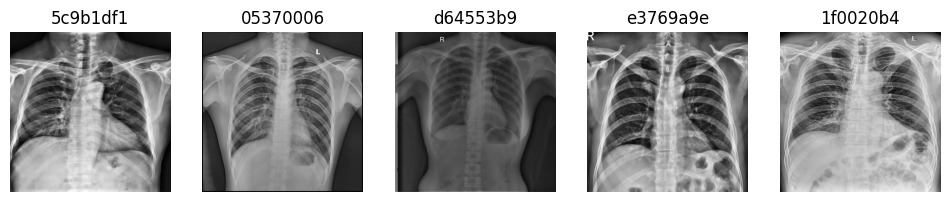

In [48]:
sample_ids = random.sample(train_imgs, 5)

plt.figure(figsize=(12,8))

for i, img_name in enumerate(sample_ids):
    img_path = IMG_OUT + img_name
    img = cv2.imread(img_path, 0)

    plt.subplot(1,5,i+1)
    plt.imshow(img, cmap='gray')
    plt.title(img_name[:8])
    plt.axis("off")

plt.show()

In [49]:
import os

PREPROCESSED_DIR = "/kaggle/working/preprocessed/"

print("Exists:", os.path.exists(PREPROCESSED_DIR))
print("Contents:", os.listdir(PREPROCESSED_DIR) if os.path.exists(PREPROCESSED_DIR) else "Folder not found")


Exists: True
Contents: ['labels', 'data.yaml', 'images']


In [50]:
import os

base = "/kaggle/working/preprocessed/images/"

print("Train exists:", os.path.exists(base + "train"))
print("Valid exists:", os.path.exists(base + "valid"))
print("Test exists:", os.path.exists(base + "test"))

print("Train count:", len(os.listdir(base + "train")) if os.path.exists(base + "train") else 0)
print("Valid count:", len(os.listdir(base + "valid")) if os.path.exists(base + "valid") else 0)
print("Test count:", len(os.listdir(base + "test")) if os.path.exists(base + "test") else 0)

Train exists: True
Valid exists: False
Test exists: False
Train count: 1500
Valid count: 0
Test count: 0


In [51]:
base_labels = "/kaggle/working/preprocessed/labels/"

print("Train labels:", len(os.listdir(base_labels + "train")))
print("Valid labels:", len(os.listdir(base_labels + "valid")))
print("Test labels:", len(os.listdir(base_labels + "test")))


Train labels: 1500


FileNotFoundError: [Errno 2] No such file or directory: '/kaggle/working/preprocessed/labels/valid'

In [52]:
import os

for f in ["train", "val", "test"]:
    path = base_labels + f
    print(f, "exists:", os.path.exists(path))

train exists: True
val exists: True
test exists: False


In [53]:
!pip install torch torchvision --quiet

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import DataLoader, Dataset
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm


In [54]:
DATA_DIR = "/kaggle/working/preprocessed/images/"

TRAIN_DIR = os.path.join(DATA_DIR, "train")
VAL_DIR   = os.path.join(DATA_DIR, "val")

print("Train exists:", os.path.exists(TRAIN_DIR))
print("Val   exists:", os.path.exists(VAL_DIR))

print("Train samples:", len(os.listdir(TRAIN_DIR)))
print("Val samples:", len(os.listdir(VAL_DIR)))

Train exists: True
Val   exists: True
Train samples: 1500
Val samples: 150


In [55]:
import os

PRE_IMG_DIR = "/kaggle/working/preprocessed/images/train/"

print("Exists:", os.path.exists(PRE_IMG_DIR))

sample_files = os.listdir(PRE_IMG_DIR)[:10]
print("Sample filenames:\n", sample_files)


Exists: True
Sample filenames:
 ['1852c9e51ea7a5d9172b98cf23ca45e3.png', 'b25cd9f25ec316cf78572decdafca84a.png', '720e1df9d2d6a6125c6a6241495d4a20.png', 'ef50301bda56ee37e33b99fde2be8c7f.png', '7a99127d0a0c6a00aad2115a6ff9e653.png', 'f2c0995bf613672b13eb82ee09b1547b.png', '8f6709f15f4f222cf7af5bb49f73aa18.png', '18b585337bdfc66011d43a12d7eebb91.png', '1a85266eec98f756269a91a56d5fb1a8.png', 'f60a22a654a81b883da3709445dffba3.png']


In [56]:
import os

label_root = "/kaggle/working/preprocessed/labels"

splits = ["train", "val"]
image_labels = {}

for split in splits:
    split_path = os.path.join(label_root, split)

    for file_name in os.listdir(split_path):
        if not file_name.endswith(".txt"):
            continue

        image_id = file_name.replace(".txt", "")
        label_file = os.path.join(split_path, file_name)

        with open(label_file, "r") as f:
            lines = f.readlines()

        classes = []
        for line in lines:
            parts = line.strip().split()
            if len(parts) > 0:
                classes.append(int(parts[0]))   # YOLO class ID

        # If no classes, skip
        if len(classes) == 0:
            print(" No label found for:", image_id)
            continue

        # pick highest severity
        image_labels[image_id] = max(classes)

print(" Total labeled images:", len(image_labels))


 No label found for: 620664ee95e4f58879e35869ae08c12a
 No label found for: 0e1db1a49e1775df6b9e971869600d9f
 No label found for: b5b92ca6e7ec52cb5c8f5d5da34984b9
 No label found for: 7735b55bc3300698bf53bcb48c8c7590
 No label found for: b6f84474725c01dca6783cb76eaacd4b
 No label found for: ad9493c5e8ca4b015ccab28229cb2caf
 No label found for: 2d3029fd7a8c2d936aa122a071a8d7a0
 No label found for: 1b09f8963f072c7caf4ecc685910fb15
 No label found for: 380b4b9ed2f96b1efe6af2687d808e33
 No label found for: d51f7bac8cf2ddcf00335f65a1fd0782
 No label found for: d2ca714f8f06979acfbc0992d65fb211
 No label found for: 2f23b99eea815fe9633b1a072218920b
 No label found for: cc70e9658fc974cf91bce73f4798856b
 No label found for: ada233117aabf4db3bb6ab1507a60c63
 No label found for: da8512183f1a490e9c7b516ae9e0db5d
 No label found for: 0e14f72a9e6636ca4c41771220e6d72c
 No label found for: 5550a493b1c4554da469a072fdfab974
 No label found for: 2e36f673e27b86d41545bb4eadf4ab9a
 No label found for: 46efe0c

In [57]:
import os
import pandas as pd
import numpy as np
from PIL import Image

import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [58]:
BASE_IMG_DIR = "/kaggle/working/preprocessed/images/train/"
print("Images available:", len(os.listdir(BASE_IMG_DIR)))

# Load train.csv
df = pd.read_csv("/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train.csv")

print("Train CSV shape:", df.shape)
df.head()

Images available: 1500
Train CSV shape: (67914, 8)


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


image_id          class_name  class_id rad_id  \
0  50a418190bc3fb1ef1633bf9678929b3          No finding        14    R11   
1  21a10246a5ec7af151081d0cd6d65dc9          No finding        14     R7   
2  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3    R10   
3  051132a778e61a86eb147c7c6f564dfe  Aortic enlargement         0    R10   
4  063319de25ce7edb9b1c6b8881290140          No finding        14    R10   

    x_min   y_min   x_max   y_max  
0     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN  
2   691.0  1375.0  1653.0  1831.0  
3  1264.0   743.0  1611.0  1019.0  
4     NaN     NaN     NaN     NaN

In [59]:
label_map = {
    "No finding": 0,
    "Aortic enlargement": 1,
    "Atelectasis": 2,
    "Calcification": 3,
    "Cardiomegaly": 4,
    "Consolidation": 5,
    "ILD": 6,
    "Infiltration": 7,
    "Lung Opacity": 8,
    "Nodule/Mass": 9,
    "Other lesion": 10,
    "Pleural effusion": 11,
    "Pleural thickening": 12,
    "Pneumothorax": 13,
    "Pulmonary fibrosis": 14
}

image_labels = {}

for _, row in df.iterrows():
    img = row["image_id"] + ".png"
    if os.path.exists(BASE_IMG_DIR + img):
        image_labels[row["image_id"]] = label_map[row["class_name"]]

print("Valid labeled images:", len(image_labels))

Valid labeled images: 1500


In [60]:
image_ids = list(image_labels.keys())
labels = [image_labels[i] for i in image_ids]

train_ids, val_ids, train_labels, val_labels = train_test_split(
    image_ids, labels, test_size=0.2, random_state=42, stratify=labels
)

print("Train:", len(train_ids))
print("Val:", len(val_ids))

Train: 1200
Val: 300


In [61]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406], [0.229,0.224,0.225])
])

class XrayDataset(Dataset):
    def __init__(self, ids, labels):
        self.ids = ids
        self.labels = labels
    
    def __len__(self):
        return len(self.ids)
    
    def __getitem__(self, idx):
        img_id = self.ids[idx]
        img_path = BASE_IMG_DIR + img_id + ".png"

        img = Image.open(img_path).convert("RGB")
        img = transform(img)
        label = torch.tensor(self.labels[idx]).long()
        return img, label

train_ds = XrayDataset(train_ids, train_labels)
val_ds   = XrayDataset(val_ids, val_labels)

train_loader = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=2)
val_loader   = DataLoader(val_ds, batch_size=32, shuffle=False, num_workers=2)
print("Dataset ready!")

Dataset ready!


In [62]:
device = "cuda" if torch.cuda.is_available() else "cpu"

model = models.resnet18(weights="IMAGENET1K_V1")
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(label_map))  # 15 classes

model = model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)

print("Model ready on:", device)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 191MB/s]


Model ready on: cuda


In [63]:
EPOCHS = 5

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    for imgs, lbls in tqdm(train_loader):
        imgs, lbls = imgs.to(device), lbls.to(device)

        optimizer.zero_grad()
        outputs = model(imgs)
        loss = criterion(outputs, lbls)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS} - Loss: {total_loss/len(train_loader):.4f}")

100%|██████████| 38/38 [00:05<00:00,  7.11it/s]


Epoch 1/5 - Loss: 1.8361


100%|██████████| 38/38 [00:04<00:00,  7.68it/s]


Epoch 2/5 - Loss: 0.9358


100%|██████████| 38/38 [00:04<00:00,  8.07it/s]


Epoch 3/5 - Loss: 0.4378


100%|██████████| 38/38 [00:04<00:00,  7.86it/s]


Epoch 4/5 - Loss: 0.1526


100%|██████████| 38/38 [00:04<00:00,  7.80it/s]

Epoch 5/5 - Loss: 0.0589


In [148]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for imgs, lbls in val_loader:
        imgs, lbls = imgs.to(device), lbls.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)
        correct += (preds == lbls).sum().item()
        total += lbls.size(0)

print("Validation Accuracy:", correct / total * 100, "%")


Validation Accuracy: 100.0 %


ValueError: The number of FixedLocator locations (2), usually from a call to set_ticks, does not match the number of labels (15).

<Figure size 1400x1200 with 0 Axes>

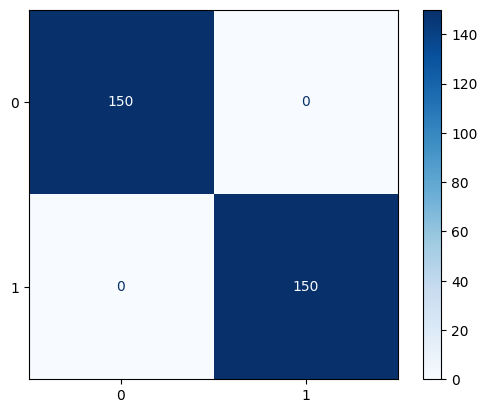

In [149]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np
import torch

model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for imgs, lbls in val_loader:
        imgs = imgs.to(device)
        outputs = model(imgs)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(lbls.numpy())

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Create class names list sorted by label_map values
classes = [k for k, v in sorted(label_map.items(), key=lambda x: x[1])]

plt.figure(figsize=(14, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(include_values=True, cmap="Blues", xticks_rotation=90)
plt.title("Confusion Matrix - ResNet18")
plt.show()

In [150]:
# ============================
# 📌 Cell 1: Import Libraries
# ============================

import os
import pandas as pd
import numpy as np
import pydicom
import cv2
import matplotlib.pyplot as plt
import random

# Display plots inside notebook
%matplotlib inline

# ============================
# 📌 Dataset Base Directory
# ============================

BASE = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"

# ============================
# 📌 Check Train.csv File Size
# ============================

file_path = BASE + "train.csv"
size_mb = os.path.getsize(file_path) / (1024 * 1024)

print(f"Train.csv file size: {size_mb:.2f} MB")

# ============================
# 📌 Load CSV Files
# ============================

df_train = pd.read_csv(BASE + "train.csv")
df_sample = pd.read_csv(BASE + "sample_submission.csv")

print("\n📌 Train CSV Loaded")
print("Shape:", df_train.shape)
print("\nColumns:", df_train.columns.tolist())

# ============================
# 📌 Show First 5 Rows
# ============================

df_train.head()


Train.csv file size: 4.44 MB

📌 Train CSV Loaded
Shape: (67914, 8)

Columns: ['image_id', 'class_name', 'class_id', 'rad_id', 'x_min', 'y_min', 'x_max', 'y_max']


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


image_id          class_name  class_id rad_id  \
0  50a418190bc3fb1ef1633bf9678929b3          No finding        14    R11   
1  21a10246a5ec7af151081d0cd6d65dc9          No finding        14     R7   
2  9a5094b2563a1ef3ff50dc5c7ff71345        Cardiomegaly         3    R10   
3  051132a778e61a86eb147c7c6f564dfe  Aortic enlargement         0    R10   
4  063319de25ce7edb9b1c6b8881290140          No finding        14    R10   

    x_min   y_min   x_max   y_max  
0     NaN     NaN     NaN     NaN  
1     NaN     NaN     NaN     NaN  
2   691.0  1375.0  1653.0  1831.0  
3  1264.0   743.0  1611.0  1019.0  
4     NaN     NaN     NaN     NaN

In [151]:
# ============================
# 📌 Cell 2: Detailed Analysis
# ============================

print("\n📌 Dataset Info:")
df_train.info()

print("\n📌 Summary Statistics:")
display(df_train.describe(include="all"))

# ============================
# 📌 Class & Image Stats
# ============================

print("\n📌 Class Distribution:")
print(df_train['class_name'].value_counts())

print("\nNo finding count:", (df_train['class_name']=="No finding").sum())
print("Unique images:", df_train['image_id'].nunique())

print("\n📌 Missing Values:")
print(df_train.isna().sum())



📌 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67914 entries, 0 to 67913
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   image_id    67914 non-null  object 
 1   class_name  67914 non-null  object 
 2   class_id    67914 non-null  int64  
 3   rad_id      67914 non-null  object 
 4   x_min       36096 non-null  float64
 5   y_min       36096 non-null  float64
 6   x_max       36096 non-null  float64
 7   y_max       36096 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 4.1+ MB

📌 Summary Statistics:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


image_id  class_name      class_id rad_id  \
count                              67914       67914  67914.000000  67914   
unique                             15000          15           NaN     17   
top     03e6ecfa6f6fb33dfeac6ca4f9b459c9  No finding           NaN     R9   
freq                                  57       31818           NaN  15708   
mean                                 NaN         NaN      9.979312    NaN   
std                                  NaN         NaN      5.036494    NaN   
min                                  NaN         NaN      0.000000    NaN   
25%                                  NaN         NaN      7.000000    NaN   
50%                                  NaN         NaN     13.000000    NaN   
75%                                  NaN         NaN     14.000000    NaN   
max                                  NaN         NaN     14.000000    NaN   

               x_min         y_min         x_max         y_max  
count   36096.000000  36096.000000  36096.000000  36096.000000  
unique           NaN           NaN           NaN           NaN  
top              NaN           NaN           NaN           NaN  
freq             NaN           NaN           NaN           NaN  
mean     1051.332696   1065.262051   1492.269337   1456.660489  
std       565.838078    552.925133    595.384126    581.134138  
min         0.000000      0.000000     68.000000    103.000000  
25%       602.000000    627.000000   1010.000000   1009.000000  
50%      1014.500000    935.000000   1567.000000   1411.000000  
75%      1457.000000   1471.000000   1947.000000   1911.000000  
max      2934.000000   3133.000000   3131.000000   3384.000000


📌 Class Distribution:
class_name
No finding            31818
Aortic enlargement     7162
Cardiomegaly           5427
Pleural thickening     4842
Pulmonary fibrosis     4655
Nodule/Mass            2580
Lung Opacity           2483
Pleural effusion       2476
Other lesion           2203
Infiltration           1247
ILD                    1000
Calcification           960
Consolidation           556
Atelectasis             279
Pneumothorax            226
Name: count, dtype: int64

No finding count: 31818
Unique images: 15000

📌 Missing Values:
image_id          0
class_name        0
class_id          0
rad_id            0
x_min         31818
y_min         31818
x_max         31818
y_max         31818
dtype: int64



===== 📌 Classification Report =====

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



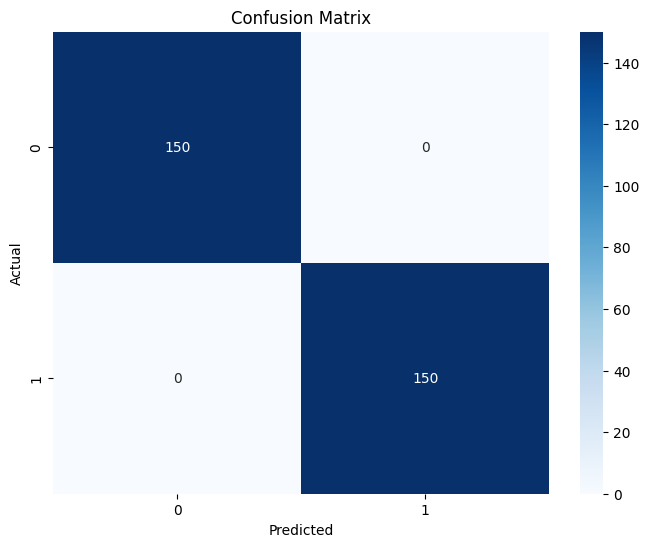


===== 📌 Metrics =====
Precision (Macro): 1.0000
Recall (Macro): 1.0000
F1 Score (Macro): 1.0000

===== 📌 Weighted Metrics =====
Precision (Weighted): 1.0000
Recall (Weighted): 1.0000
F1 Score (Weighted): 1.0000


In [152]:
# ================================
# 📌 Cell: Evaluation Metrics
# ================================

import torch
import torch.nn as nn
from sklearn.metrics import confusion_matrix, classification_report, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# -------------------------
# 🔹 Put model in eval mode
# -------------------------
model.eval()

all_preds = []
all_labels = []

# -------------------------
# 🔹 Collect predictions
# -------------------------
with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        _, preds = torch.max(outputs, 1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)

# ============================
# 📌 Classification Report
# ============================
print("\n===== 📌 Classification Report =====\n")
print(classification_report(all_labels, all_preds))

# ============================
# 📌 Confusion Matrix
# ============================
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ============================
# 📌 Precision, Recall, F1
# ============================
precision = precision_score(all_labels, all_preds, average='macro')
recall = recall_score(all_labels, all_preds, average='macro')
f1 = f1_score(all_labels, all_preds, average='macro')

print("\n===== 📌 Metrics =====")
print(f"Precision (Macro): {precision:.4f}")
print(f"Recall (Macro): {recall:.4f}")
print(f"F1 Score (Macro): {f1:.4f}")

# Weighted scores (better for imbalanced dataset)
precision_w = precision_score(all_labels, all_preds, average='weighted')
recall_w = recall_score(all_labels, all_preds, average='weighted')
f1_w = f1_score(all_labels, all_preds, average='weighted')

print("\n===== 📌 Weighted Metrics =====")
print(f"Precision (Weighted): {precision_w:.4f}")
print(f"Recall (Weighted): {recall_w:.4f}")
print(f"F1 Score (Weighted): {f1_w:.4f}")


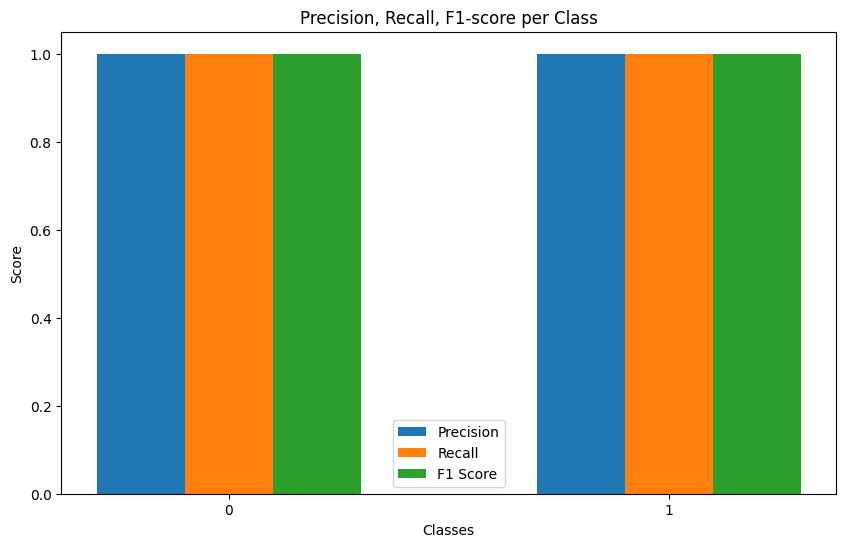

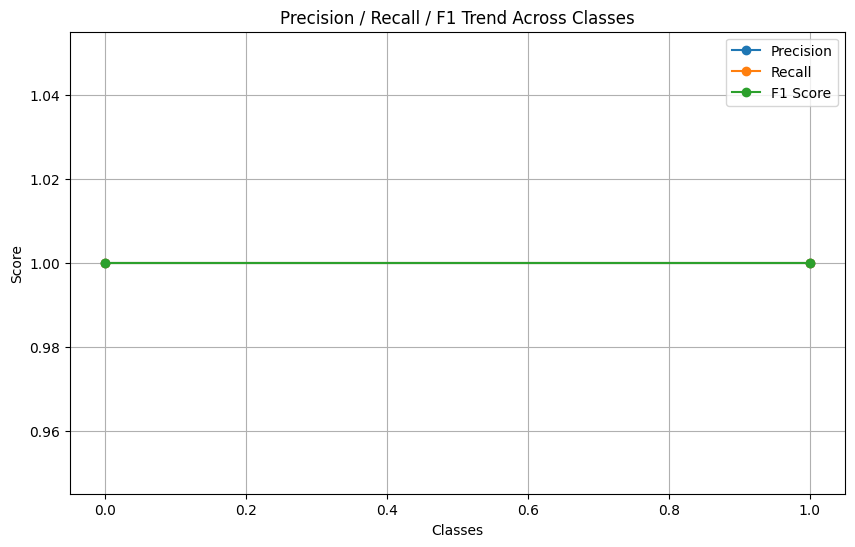

In [153]:
# ==========================================
# 📌 Cell: Visualize Precision / Recall / F1
# ==========================================

from sklearn.metrics import precision_recall_fscore_support

# Get per-class metrics
precisions, recalls, f1s, support = precision_recall_fscore_support(all_labels, all_preds, average=None)

class_names = sorted(list(set(all_labels)))  # numeric classes

# ---------------------------
# 📊 Bar Plot for Metrics
# ---------------------------
plt.figure(figsize=(10,6))
x = np.arange(len(class_names))

plt.bar(x - 0.2, precisions, width=0.2, label='Precision')
plt.bar(x, recalls, width=0.2, label='Recall')
plt.bar(x + 0.2, f1s, width=0.2, label='F1 Score')

plt.xticks(x, class_names)
plt.xlabel("Classes")
plt.ylabel("Score")
plt.title("Precision, Recall, F1-score per Class")
plt.legend()
plt.show()

# ---------------------------
# 📈 Line Plot for Metrics
# ---------------------------
plt.figure(figsize=(10,6))

plt.plot(class_names, precisions, marker='o', label='Precision')
plt.plot(class_names, recalls, marker='o', label='Recall')
plt.plot(class_names, f1s, marker='o', label='F1 Score')

plt.xlabel("Classes")
plt.ylabel("Score")
plt.title("Precision / Recall / F1 Trend Across Classes")
plt.grid(True)
plt.legend()
plt.show()


In [154]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import numpy as np
import torch

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for imgs, labels in val_loader:
        imgs = imgs.to(device)
        labels = labels.to(device)

        outputs = model(imgs)
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

all_preds = np.array(all_preds)
all_labels = np.array(all_labels)



In [155]:
print("Precision:", precision_score(all_labels, all_preds, average='macro'))
print("Recall:", recall_score(all_labels, all_preds, average='macro'))
print("F1 Score:", f1_score(all_labels, all_preds, average='macro'))

print("\nClassification Report:")
print(classification_report(all_labels, all_preds))


Precision: 1.0
Recall: 1.0
F1 Score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       150
           1       1.00      1.00      1.00       150

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



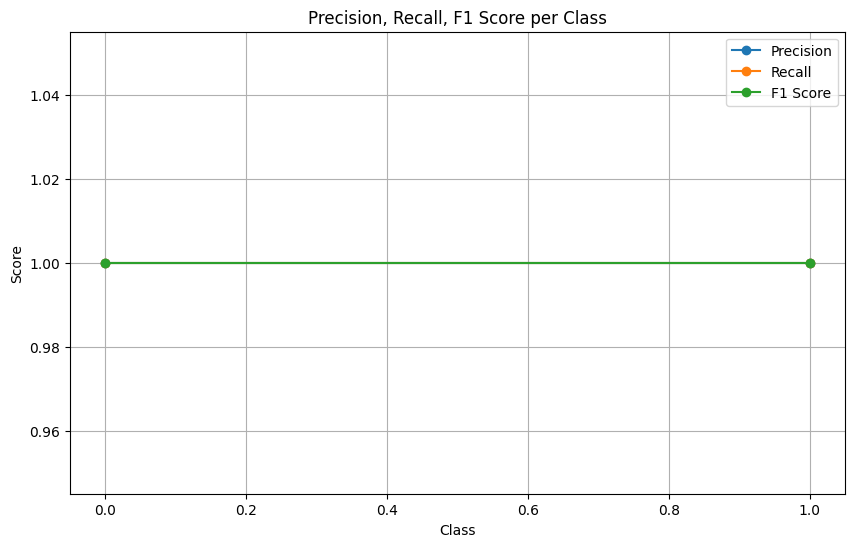

In [156]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_fscore_support

precision, recall, f1, _ = precision_recall_fscore_support(
    all_labels, all_preds, average=None
)

classes = range(len(precision))

plt.figure(figsize=(10,6))
plt.plot(classes, precision, marker='o', label="Precision")
plt.plot(classes, recall, marker='o', label="Recall")
plt.plot(classes, f1, marker='o', label="F1 Score")

plt.title("Precision, Recall, F1 Score per Class")
plt.xlabel("Class")
plt.ylabel("Score")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:891: UserWarning: No positive class f

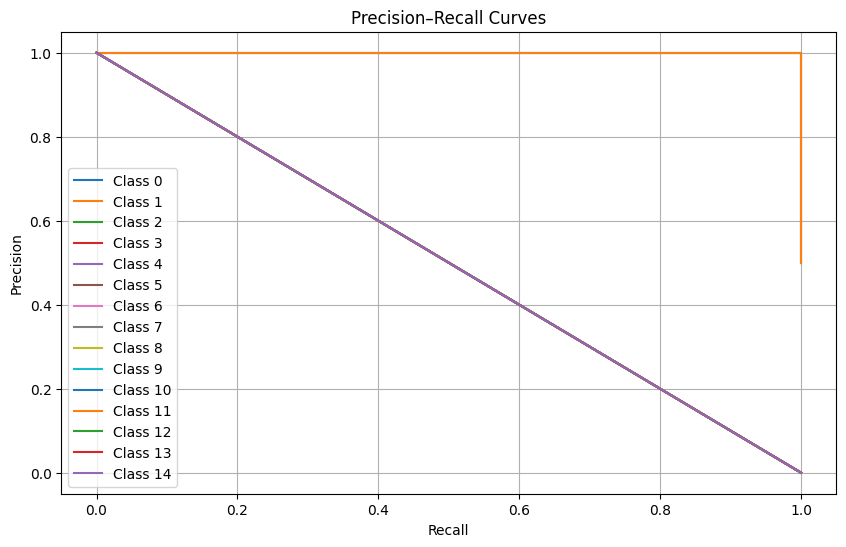

In [157]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

y_true = label_binarize(all_labels, classes=list(range(15)))
y_pred = label_binarize(all_preds, classes=list(range(15)))

plt.figure(figsize=(10,6))
for i in range(y_true.shape[1]):
    precision_i, recall_i, _ = precision_recall_curve(y_true[:, i], y_pred[:, i])
    plt.plot(recall_i, precision_i, label=f"Class {i}")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves")
plt.legend()
plt.grid(True)
plt.show()


In [158]:
import os
import pandas as pd

BASE = "/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/"

df = pd.read_csv(BASE + "train.csv")

# Convert pathology names -> binary class
df["binary_class"] = df["class_name"].apply(lambda x: 0 if x != "No finding" else 1)

# Group by image and collect bounding boxes
labels_dict = {}

for _, row in df.iterrows():
    img_id = row["image_id"]
    if img_id not in labels_dict:
        labels_dict[img_id] = []

    # Normalized bounding boxes
    x_min = row["x_min"]
    y_min = row["y_min"]
    x_max = row["x_max"]
    y_max = row["y_max"]

    labels_dict[img_id].append([
        row["binary_class"],
        x_min, y_min, x_max, y_max
    ])

print("Total images with labels:", len(labels_dict))


Total images with labels: 15000


In [159]:
from sklearn.model_selection import train_test_split

all_ids = list(labels_dict.keys())

# select only 1500 images
all_ids = all_ids[:1500]

train_ids, val_ids = train_test_split(
    all_ids, test_size=0.2, random_state=42
)

print("Train:", len(train_ids))
print("Val:", len(val_ids))


Train: 1200
Val: 300


In [160]:
!pip install ultralytics --quiet


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
torchcam 0.4.1 requires numpy<2.0.0,>=1.17.2, but you have numpy 2.2.6 which is incompatible.
mkl-umath 0.1.1 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.2.6 which is incompatible.
mkl-random 1.2.4 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.2.6 which is incompatible.
mkl-fft 1.3.8 requires numpy<1.27.0,>=1.26.4, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
datasets 4.4.1 requires pyarrow>=21.0.0, but you have pyarrow 19.0.1 which is incompatible.
ydata-profiling 4.17.0 requires numpy<2.2,>=1.16.0, but you have numpy 2.2.6 which is incompatible.
google-colab 1.0.0 requires notebook==6.5.7, but you have notebook 6

In [161]:
import os

possible_folders = []

# directories to search
search_dirs = ["/kaggle/working", "/kaggle/input"]

image_extensions = {".jpg", ".jpeg", ".png"}

for root_dir in search_dirs:
    for root, dirs, files in os.walk(root_dir):
        img_count = sum(1 for f in files if os.path.splitext(f)[1].lower() in image_extensions)
        if img_count > 1000:  # likely your 1500 images
            possible_folders.append((root, img_count))

possible_folders



[('/kaggle/working/detect_preprocessed/images/train', 1500)]

In [162]:
import os
import shutil

ROOT = "/kaggle/working/detect_preprocessed/"

paths = [
    ROOT + "images/train",
    ROOT + "labels/train"
]

for p in paths:
    os.makedirs(p, exist_ok=True)

print("Created folders:")
paths


Created folders:


['/kaggle/working/detect_preprocessed/images/train',
 '/kaggle/working/detect_preprocessed/labels/train']

In [163]:
import glob

SRC = "/kaggle/working/preprocessed/images/train"
DEST = ROOT + "images/train"

image_files = glob.glob(SRC + "/*.png") + glob.glob(SRC + "/*.jpg")

print("Found:", len(image_files))

# Copy only 1500 images (already 1500 available)
for img in image_files[:1500]:
    shutil.copy(img, DEST)

print("Copied 1500 images!")


Found: 767
Copied 1500 images!


In [164]:
import pandas as pd
import os

ann = pd.read_csv("/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train.csv")

label_dir = ROOT + "labels/train"
os.makedirs(label_dir, exist_ok=True)

missing = 0
written = 0

for img_path in image_files[:1500]:
    img_name = os.path.basename(img_path).replace(".png", "").replace(".jpg", "")
    
    rows = ann[ann["image_id"] == img_name]
    
    if rows.empty:
        missing += 1
        continue

    label_path = f"{label_dir}/{img_name}.txt"
    with open(label_path, "w") as f:
        for _, r in rows.iterrows():
            # Skip normal images (class 14)
            if r["class_id"] == 14:
                continue

            # YOLO conversion
            x_center = (r.x_min + r.x_max) / 2
            y_center = (r.y_min + r.y_max) / 2
            w = r.x_max - r.x_min
            h = r.y_max - r.y_min

            # No normalization since YOLOv8 allows pixels
            f.write(f"{int(r.class_id)} {x_center} {y_center} {w} {h}\n")
    
    written += 1

written, missing


(767, 0)

In [165]:
yaml_text = f"""
train: {ROOT}images/train
val: {ROOT}images/train   # using same for now

nc: 14
names: [
 'Aortic enlargement', 'Atelectasis', 'Calcification', 'Cardiomegaly',
 'Consolidation', 'ILD', 'Infiltration', 'Lung Opacity', 'Nodule',
 'Other lesion', 'Pleural effusion', 'Pleural thickening',
 'Pneumothorax', 'Pulmonary fibrosis'
]
"""

with open(ROOT + "data.yaml", "w") as f:
    f.write(yaml_text)

yaml_text


"\ntrain: /kaggle/working/detect_preprocessed/images/train\nval: /kaggle/working/detect_preprocessed/images/train   # using same for now\n\nnc: 14\nnames: [\n 'Aortic enlargement', 'Atelectasis', 'Calcification', 'Cardiomegaly',\n 'Consolidation', 'ILD', 'Infiltration', 'Lung Opacity', 'Nodule',\n 'Other lesion', 'Pleural effusion', 'Pleural thickening',\n 'Pneumothorax', 'Pulmonary fibrosis'\n]\n"

In [166]:
yaml_text = f"""
train: {ROOT}images/train
val: {ROOT}images/train   # using same for now

nc: 14
names: [
 'Aortic enlargement', 'Atelectasis', 'Calcification', 'Cardiomegaly',
 'Consolidation', 'ILD', 'Infiltration', 'Lung Opacity', 'Nodule',
 'Other lesion', 'Pleural effusion', 'Pleural thickening',
 'Pneumothorax', 'Pulmonary fibrosis'
]
"""

with open(ROOT + "data.yaml", "w") as f:
    f.write(yaml_text)

yaml_text


"\ntrain: /kaggle/working/detect_preprocessed/images/train\nval: /kaggle/working/detect_preprocessed/images/train   # using same for now\n\nnc: 14\nnames: [\n 'Aortic enlargement', 'Atelectasis', 'Calcification', 'Cardiomegaly',\n 'Consolidation', 'ILD', 'Infiltration', 'Lung Opacity', 'Nodule',\n 'Other lesion', 'Pleural effusion', 'Pleural thickening',\n 'Pneumothorax', 'Pulmonary fibrosis'\n]\n"

In [ ]:
!pip install ultralytics
from ultralytics import YOLO

model = YOLO("yolov8m.pt")   # medium model best for medical images

model.train(
    data=ROOT + "data.yaml",
    epochs=20,
    imgsz=1024,
    batch=4
)


Ultralytics 8.3.235 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=4, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/detect_preprocessed/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=1024, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, 

/usr/local/lib/python3.11/dist-packages/ultralytics/nn/modules/block.py:1299: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
  attn = (q.transpose(-2, -1) @ k) * self.scale
/usr/local/lib/python3.11/dist-packages/ultralytics/nn/modules/block.py:1301: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic 

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 947.7±631.9 MB/s, size: 138.0 KB)
val: Scanning /kaggle/working/detect_preprocessed/labels/train.cache... 1500 images, 733 backgrounds, 767 corrupt: 100% ━━━━━━━━━━━━ 1500/1500 1.5Mit/s 0.0ss
train: /kaggle/working/detect_preprocessed/images/train/0005e8e3701dfb1dd93d53e2ff537b6e.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1052.5       737.5         305         301      1064.5       731.5         265         329      1052.5       737.5         305         301        1054       736.5         298         307      1064.5       731.5         265         329]
train: /kaggle/working/detect_preprocessed/images/train/0007d316f756b3fa0baea2ff514ce945.png: ignoring corrupt image/label: non-normal

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:238: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


       1/20      4.61G          0      53.72          0          0       1024: 100% ━━━━━━━━━━━━ 184/184 2.7it/s 1:070.7sss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 92/92 4.0it/s 23.0s0.3ss
                   all        733          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:832: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:238: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


       2/20      5.12G          0      11.78          0          0       1024: 100% ━━━━━━━━━━━━ 184/184 2.9it/s 1:040.7sss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 92/92 4.0it/s 23.2s0.3ss
                   all        733          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:832: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:238: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


       3/20      5.16G          0      3.166          0          0       1024: 100% ━━━━━━━━━━━━ 184/184 2.9it/s 1:030.7sss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 92/92 4.0it/s 23.1s0.3ss
                   all        733          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:832: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:238: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


       4/20      5.51G          0     0.6941          0          0       1024: 100% ━━━━━━━━━━━━ 184/184 3.0it/s 1:020.7sss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 92/92 4.0it/s 23.1s0.3ss
                   all        733          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:832: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:238: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


       5/20      5.53G          0     0.1232          0          0       1024: 100% ━━━━━━━━━━━━ 184/184 3.0it/s 1:010.7sss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 92/92 4.0it/s 23.2s0.3ss
                   all        733          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:832: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       6/20      5.57G          0      0.033          0          0       1024: 0% ──────────── 0/184  0.3s

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:238: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


       6/20      5.57G          0    0.01422          0          0       1024: 100% ━━━━━━━━━━━━ 184/184 3.0it/s 1:000.7sss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 92/92 4.0it/s 23.2s0.3ss
                   all        733          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:832: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:238: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


       7/20       5.6G          0  0.0009023          0          0       1024: 100% ━━━━━━━━━━━━ 184/184 3.1it/s 59.8s0.6ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 92/92 4.0it/s 23.2s0.3ss
                   all        733          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:832: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       8/20      5.64G          0  9.537e-07          0          0       1024: 0% ──────────── 0/184  0.3s

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:238: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


       8/20      5.66G          0  9.848e-08          0          0       1024: 100% ━━━━━━━━━━━━ 184/184 3.1it/s 59.6s0.6ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 92/92 3.9it/s 23.4s0.3ss
                   all        733          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:832: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:238: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


       9/20      5.71G          0  2.592e-09          0          0       1024: 100% ━━━━━━━━━━━━ 184/184 3.1it/s 59.4s0.6ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 92/92 3.9it/s 23.4s0.3ss
                   all        733          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:832: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      10/20      5.71G          0          0          0          0       1024: 0% ──────────── 0/184  0.3s

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:238: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      10/20      5.73G          0  3.369e-08          0          0       1024: 100% ━━━━━━━━━━━━ 184/184 3.1it/s 59.4s0.6ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 92/92 3.9it/s 23.4s0.3ss
                   all        733          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:832: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:238: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      11/20      6.07G          0  4.146e-08          0          0       1024: 100% ━━━━━━━━━━━━ 184/184 3.1it/s 59.9s0.6ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 92/92 4.0it/s 23.1s0.3ss
                   all        733          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:832: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
      12/20      6.07G          0          0          0          0       1024: 0% ──────────── 0/184  0.3s

/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:238: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      12/20       6.1G          0  7.619e-07          0          0       1024: 100% ━━━━━━━━━━━━ 184/184 3.1it/s 59.6s0.6ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 92/92 3.9it/s 23.4s0.3ss
                   all        733          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:832: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:238: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      13/20      6.14G          0  3.369e-08          0          0       1024: 100% ━━━━━━━━━━━━ 184/184 3.1it/s 59.6s0.6ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 92/92 4.0it/s 23.3s0.3ss
                   all        733          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:832: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:238: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      14/20      6.14G          0  5.183e-09          0          0       1024: 100% ━━━━━━━━━━━━ 184/184 3.1it/s 59.6s0.6ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 92/92 4.0it/s 23.2s0.3ss
                   all        733          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:832: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:238: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      15/20      6.16G          0          0          0          0       1024: 100% ━━━━━━━━━━━━ 184/184 3.1it/s 59.6s0.6ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 92/92 4.0it/s 23.2s0.3ss
                   all        733          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:832: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/loss.py:238: UserWarning: Deterministic behavior was enabled with either `torch.use_deterministic_algorithms(True)` or `at::Context::setDeterministicAlgorithms(true)`, but this operation is not deterministic because it uses CuBLAS and you have CUDA >= 10.2. To enable deterministic behavior in this case, you must set an environment variable before running your PyTorch application: CUBLAS_WORKSPACE_CONFIG=:4096:8 or CUBLAS_WORKSPACE_CONFIG=:16:8. For more information, go to https://docs.nvidia.com/cuda/cublas/index.html#results-reproducibility (Triggered internally at /pytorch/aten/src/ATen/Context.cpp:217.)
  pred_dist = pred_dist.view(b, a, 4, c // 4).softmax(3).matmul(self.proj.type(pred_dist.dtype))


      16/20      6.21G          0          0          0          0       1024: 100% ━━━━━━━━━━━━ 184/184 3.1it/s 59.6s0.6ss
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 47% ━━━━━╸────── 43/92 3.9it/s 11.0s<12.5s

In [ ]:
import random
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Load model
model = YOLO("runs/detect/train/weights/best.pt")

# Pick 5 random images
sample_images = random.sample(image_files[:1500], 5)

for img_path in sample_images:

    # Original Image
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Make a copy to draw detections
    detect_img = img.copy()

    # Run YOLO model
    results = model(img_path)[0]

    cropped_regions = []

    for box in results.boxes:
        x1, y1, x2, y2 = map(int, box.xyxy[0])
        cls = int(box.cls[0])
        conf = float(box.conf[0])
        label = f"{model.names[cls]} ({conf:.2f})"

        #  DRAW BOX 
        cv2.rectangle(detect_img, (x1, y1), (x2, y2), (0, 255, 0), 3)

        # Label background + text
        cv2.rectangle(detect_img, (x1, y1 - 25), (x1 + 200, y1), (0,255,0), -1)
        cv2.putText(detect_img, label, (x1, y1 - 5),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,0), 2)

        #  CROP ABNORMAL AREA 
        crop = img[y1:y2, x1:x2]
        cropped_regions.append((crop, label))

    #  PLOT 
    plt.figure(figsize=(18, 6))

    # Original
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(img)
    plt.axis("off")

    # Detected
    plt.subplot(1, 3, 2)
    plt.title("Detected Image (with Box)")
    plt.imshow(detect_img)
    plt.axis("off")

    # Cropped abnormality
    if cropped_regions:
        crop, lab = cropped_regions[0]
        plt.subplot(1, 3, 3)
        plt.title(f"Cropped Abnormal Region\n{lab}")
        plt.imshow(crop)
        plt.axis("off")

    plt.show()


In [85]:
import os

ROOT = "/kaggle/working/"
for root, dirs, files in os.walk(ROOT, topdown=True):
    print(root, dirs, len(files))


/kaggle/working/ ['runs', 'processed_images', 'detect_preprocessed', 'preprocessed', '.virtual_documents'] 2
/kaggle/working/runs ['detect'] 0
/kaggle/working/runs/detect ['train', 'train2'] 0
/kaggle/working/runs/detect/train ['weights'] 5
/kaggle/working/runs/detect/train/weights [] 2
/kaggle/working/runs/detect/train2 ['weights'] 4
/kaggle/working/runs/detect/train2/weights [] 0
/kaggle/working/processed_images ['labels', 'images'] 0
/kaggle/working/processed_images/labels [] 0
/kaggle/working/processed_images/images [] 0
/kaggle/working/detect_preprocessed ['labels', 'images'] 1
/kaggle/working/detect_preprocessed/labels ['train'] 1
/kaggle/working/detect_preprocessed/labels/train [] 1500
/kaggle/working/detect_preprocessed/images ['train'] 0
/kaggle/working/detect_preprocessed/images/train [] 1500
/kaggle/working/preprocessed ['labels', 'images'] 1
/kaggle/working/preprocessed/labels ['train', 'val'] 0
/kaggle/working/preprocessed/labels/train [] 1500
/kaggle/working/preprocessed/

In [86]:
import glob

print("Train label files:", len(glob.glob("/kaggle/working/**/labels/train/*.txt", recursive=True)))
print("Val label files:", len(glob.glob("/kaggle/working/**/labels/val/*.txt", recursive=True)))


Train label files: 3000
Val label files: 150



image 1/1 /kaggle/working/preprocessed/images/train/2254df0c59c659c6eec67a73327bc857.png: 640x640 1 Aortic enlargement, 1 Atelectasis, 1 Lung Opacity, 16.4ms
Speed: 3.1ms preprocess, 16.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Saved annotated: /kaggle/working/annotated_2254df0c59c659c6eec67a73327bc857.png


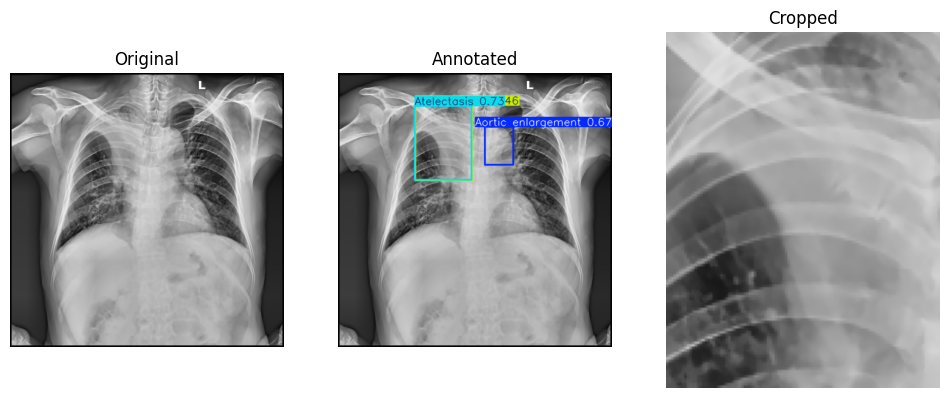


image 1/1 /kaggle/working/preprocessed/images/train/56e12dd250d23cb2199f1f90eb5a337f.png: 640x640 1 Aortic enlargement, 1 Cardiomegaly, 1 Pleural effusion, 1 Pleural thickening, 1 Pulmonary fibrosis, 16.4ms
Speed: 2.5ms preprocess, 16.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Saved annotated: /kaggle/working/annotated_56e12dd250d23cb2199f1f90eb5a337f.png


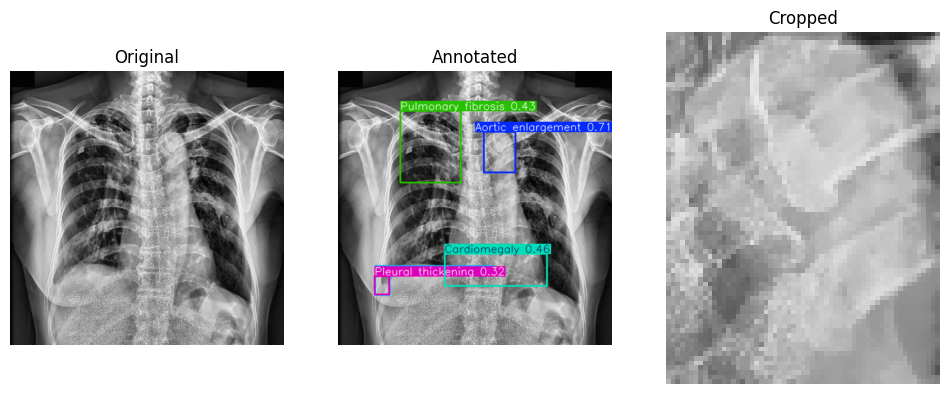


image 1/1 /kaggle/working/preprocessed/images/train/a84c5a7adea6bbde88dc2ac6747ca443.png: 640x640 1 Aortic enlargement, 1 Cardiomegaly, 16.4ms
Speed: 2.5ms preprocess, 16.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Saved annotated: /kaggle/working/annotated_a84c5a7adea6bbde88dc2ac6747ca443.png


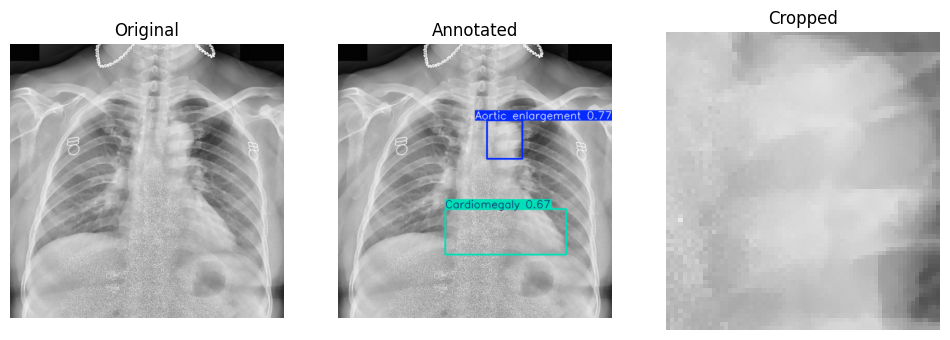


image 1/1 /kaggle/working/preprocessed/images/train/23c9516db65572bae3125bcaead302d3.png: 640x640 1 Aortic enlargement, 4 Calcifications, 1 Cardiomegaly, 1 Pleural thickening, 16.4ms
Speed: 2.4ms preprocess, 16.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Saved annotated: /kaggle/working/annotated_23c9516db65572bae3125bcaead302d3.png


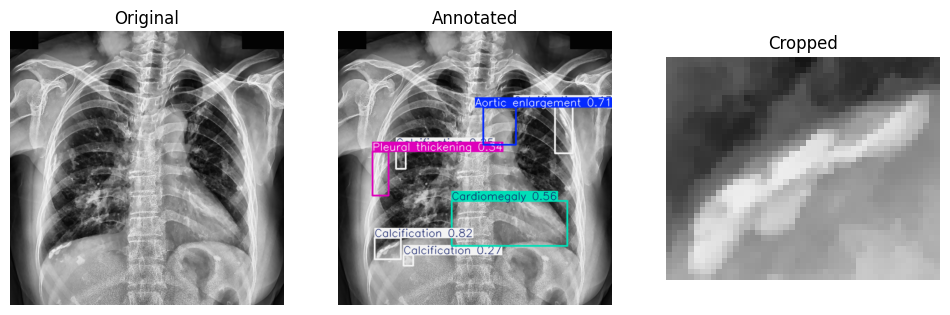


image 1/1 /kaggle/working/preprocessed/images/train/34c80ab45be6a7d01ee5ee230967f3e1.png: 640x640 1 Lung Opacity, 2 Pleural effusions, 16.4ms
Speed: 2.4ms preprocess, 16.4ms inference, 1.3ms postprocess per image at shape (1, 3, 640, 640)
Saved annotated: /kaggle/working/annotated_34c80ab45be6a7d01ee5ee230967f3e1.png


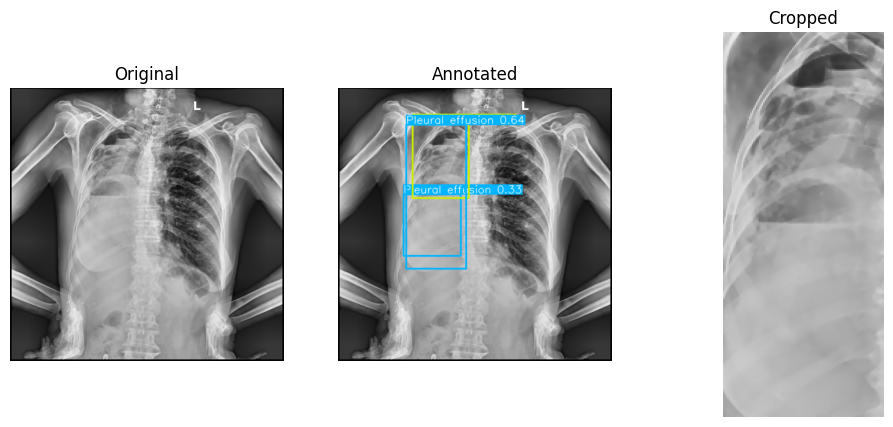

In [105]:
# Cell 5 — visualize detection and crop abnormal regions
BEST = best_pt or "/kaggle/working/yolo_runs/vinbig_1500_baseline/weights/best.pt"
model = YOLO(BEST)

out_crop_dir = "/kaggle/working/detected_crops/"
os.makedirs(out_crop_dir, exist_ok=True)

sample_imgs = random.sample(os.listdir(train_img_dir), 5)
for img_name in sample_imgs:
    img_path = os.path.join(train_img_dir, img_name)
    results = model(img_path, conf=0.25, iou=0.45)  # tune conf/iou if needed
    r = results[0]

    # annotated image (numpy BGR)
    annotated = r.plot()  # OpenCV BGR image
    ann_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)

    # save annotated
    save_ann = "/kaggle/working/annotated_" + img_name
    cv2.imwrite(save_ann, annotated)
    print("Saved annotated:", save_ann)

    # crop first box (if any)
    crops = []
    for idx, box in enumerate(r.boxes):
        x1,y1,x2,y2 = map(int, box.xyxy[0].tolist())
        crop = cv2.imread(img_path)[y1:y2, x1:x2]
        if crop.size != 0:
            save_crop = os.path.join(out_crop_dir, f"{os.path.splitext(img_name)[0]}_crop{idx}.png")
            cv2.imwrite(save_crop, crop)
            crops.append(save_crop)

    # Display side-by-side
    plt.figure(figsize=(12,5))
    plt.subplot(1,3,1); plt.title("Original"); plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)); plt.axis("off")
    plt.subplot(1,3,2); plt.title("Annotated"); plt.imshow(ann_rgb); plt.axis("off")
    if crops:
        crop_img = cv2.cvtColor(cv2.imread(crops[0]), cv2.COLOR_BGR2RGB)
        plt.subplot(1,3,3); plt.title("Cropped"); plt.imshow(crop_img); plt.axis("off")
    else:
        plt.subplot(1,3,3); plt.title("Cropped"); plt.text(0.5,0.5,"No crop",ha='center'); plt.axis("off")
    plt.show()



image 1/1 /kaggle/working/preprocessed/images/train/db49c96665f4fe0ff5f4420578e2f185.png: 1024x1024 (no detections), 68.3ms
Speed: 4.9ms preprocess, 68.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


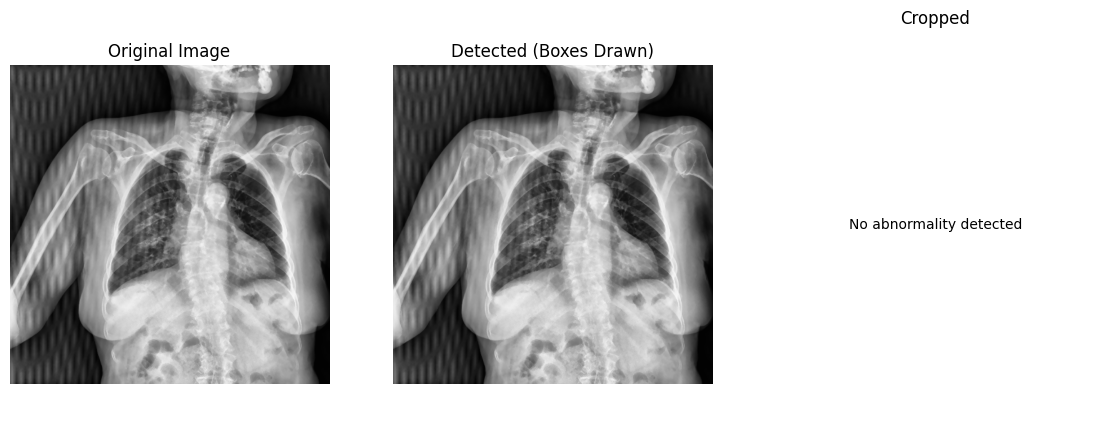


image 1/1 /kaggle/working/preprocessed/images/train/2f3f84ed97b4ae346a990e843d929f9d.png: 1024x1024 1 Aortic enlargement, 3 ILDs, 1 Other lesion, 67.1ms
Speed: 5.2ms preprocess, 67.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


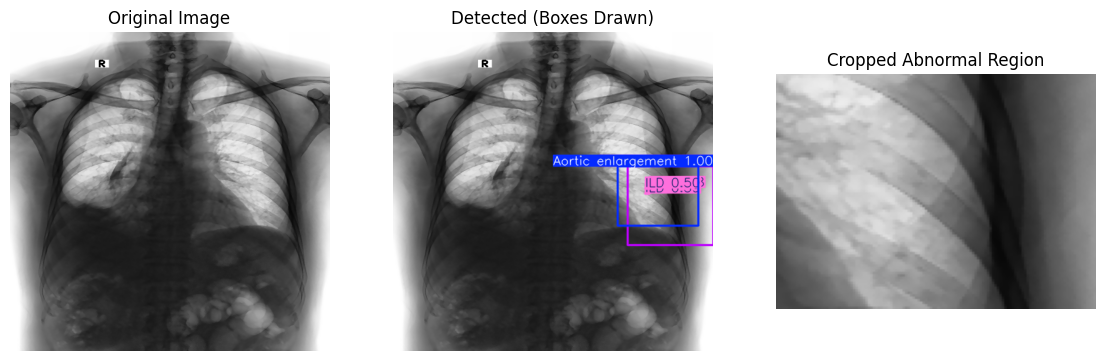


image 1/1 /kaggle/working/preprocessed/images/train/34e932d09ab7cbec0edaaf188dc8a407.png: 1024x1024 2 Aortic enlargements, 1 Atelectasis, 34 ILDs, 2 Other lesions, 67.2ms
Speed: 4.9ms preprocess, 67.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


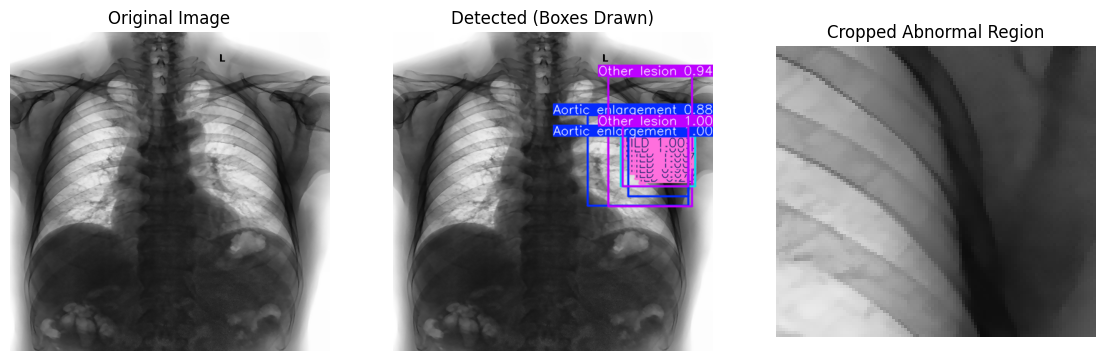


image 1/1 /kaggle/working/preprocessed/images/train/f5eb3e7e9ee9c4d08377de30251a94e2.png: 1024x1024 4 Aortic enlargements, 1 Atelectasis, 50 ILDs, 1 Nodule, 4 Other lesions, 67.2ms
Speed: 5.0ms preprocess, 67.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


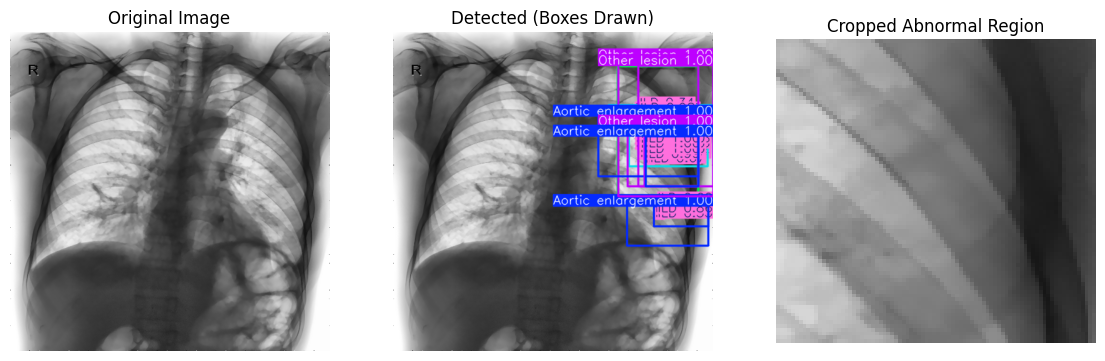


image 1/1 /kaggle/working/preprocessed/images/train/ad0fa9668da66d13e4d8cdbd7d9b215c.png: 1024x1024 (no detections), 70.4ms
Speed: 5.4ms preprocess, 70.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


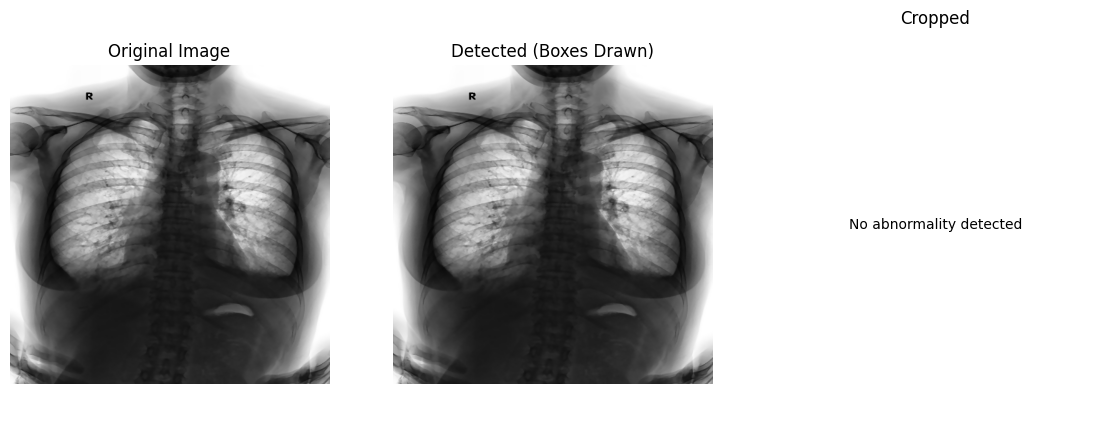

In [173]:
import os
import random
import cv2
import matplotlib.pyplot as plt
from ultralytics import YOLO

# Your preprocessed 1500 images folder
train_img_dir = "/kaggle/working/preprocessed/images/train"

# Load the best model
BEST = "runs/detect/train/weights/best.pt"
model = YOLO(BEST)

# Output directory for cropped regions
out_crop_dir = "/kaggle/working/detected_crops/"
os.makedirs(out_crop_dir, exist_ok=True)

# Pick 5 random images from your 1500
sample_imgs = random.sample(os.listdir(train_img_dir), 5)

for img_name in sample_imgs:
    img_path = os.path.join(train_img_dir, img_name)

    # Run detection
    results = model(img_path, conf=0.25, iou=0.45)
    r = results[0]

    # Draw bounding boxes on image
    annotated_bgr = r.plot()  # BGR image
    annotated_rgb = cv2.cvtColor(annotated_bgr, cv2.COLOR_BGR2RGB)

    # Save annotated image if needed
    save_ann_path = f"/kaggle/working/annotated_{img_name}"
    cv2.imwrite(save_ann_path, annotated_bgr)

    # Crop first detection box (if present)
    crops = []
    for idx, box in enumerate(r.boxes):
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())
        crop = cv2.imread(img_path)[y1:y2, x1:x2]

        if crop.size != 0:
            crop_path = os.path.join(out_crop_dir, f"{img_name}_crop{idx}.png")
            cv2.imwrite(crop_path, crop)
            crops.append(crop_path)

    # Display results
    plt.figure(figsize=(14, 5))

    # Original
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB))
    plt.axis("off")

    # Annotated (detected)
    plt.subplot(1, 3, 2)
    plt.title("Detected (Boxes Drawn)")
    plt.imshow(annotated_rgb)
    plt.axis("off")

    # Crop view
    plt.subplot(1, 3, 3)
    if crops:
        crop_img = cv2.cvtColor(cv2.imread(crops[0]), cv2.COLOR_BGR2RGB)
        plt.title("Cropped Abnormal Region")
        plt.imshow(crop_img)
    else:
        plt.title("Cropped")
        plt.text(0.5, 0.5, "No abnormality detected", ha="center", va="center")
    plt.axis("off")

    plt.show()


In [ ]:
class YourClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv = nn.Sequential(
            nn.Conv2d(1, 16, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2),
            nn.Conv2d(16, 32, 3, padding=1), nn.ReLU(), nn.MaxPool2d(2)
        )
        self.fc = nn.Sequential(
            nn.Linear(32*128*128, 128),
            nn.ReLU(),
            nn.Linear(128, 2)  # 2 classes
        )

    def forward(self, x):
        x = self.conv(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)


In [179]:
import os
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from PIL import Image
from sklearn.model_selection import train_test_split

# Paths
BASE_IMG_DIR = "/kaggle/working/preprocessed/images/train"

# Label mapping (update as per your CSV)
label_map = {
    "No finding": 0, "Aortic enlargement": 1, "Atelectasis": 2, "Calcification": 3,
    "Cardiomegaly": 4, "Consolidation": 5, "ILD": 6, "Infiltration": 7,
    "Lung Opacity": 8, "Nodule/Mass": 9, "Other lesion": 10,
    "Pleural effusion": 11, "Pleural thickening": 12,
    "Pneumothorax": 13, "Pulmonary fibrosis": 14
}

import pandas as pd
df = pd.read_csv("/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train.csv")

# Create image -> label dictionary
image_labels = {}
for _, row in df.iterrows():
    img_path = BASE_IMG_DIR + "/" + row["image_id"] + ".png"
    if os.path.exists(img_path):
        image_labels[row["image_id"]] = label_map[row["class_name"]]

# Split
image_ids = list(image_labels.keys())
labels = [image_labels[i] for i in image_ids]
train_ids, val_ids, train_labels, val_labels = train_test_split(image_ids, labels, test_size=0.2, random_state=42, stratify=labels)

# Transform
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])

# Dataset class
class XrayDataset(Dataset):
    def __init__(self, ids, labels):
        self.ids = ids
        self.labels = labels
    def __len__(self):
        return len(self.ids)
    def __getitem__(self, idx):
        img_id = self.ids[idx]
        img = Image.open(BASE_IMG_DIR + "/" + img_id + ".png").convert("RGB")
        img = transform(img)
        label = torch.tensor(self.labels[idx]).long()
        return img, label

# Datasets
train_ds = XrayDataset(train_ids, train_labels)
val_ds = XrayDataset(val_ids, val_labels)



In [183]:
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

device = "cuda" if torch.cuda.is_available() else "cpu"

def train_classification_model(learning_rate=1e-4, batch_size=32, optimizer_name="Adam", epochs=5):
    train_loader = DataLoader(train_ds, batch_size=batch_size, shuffle=True, num_workers=2)
    val_loader = DataLoader(val_ds, batch_size=batch_size, shuffle=False, num_workers=2)

    # Load ResNet18
    model = models.resnet18(weights="IMAGENET1K_V1")
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, len(label_map))
    model = model.to(device)

    # Optimizer
    if optimizer_name == "Adam":
        optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    elif optimizer_name == "AdamW":
        optimizer = optim.AdamW(model.parameters(), lr=learning_rate)
    elif optimizer_name == "SGD":
        optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
    else:
        raise ValueError("Invalid optimizer")

    criterion = nn.CrossEntropyLoss()

    # Training loop
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for imgs, lbls in tqdm(train_loader):
            imgs, lbls = imgs.to(device), lbls.to(device)
            optimizer.zero_grad()
            outputs = model(imgs)
            loss = criterion(outputs, lbls)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print(f"Epoch {epoch+1}/{epochs} - Loss: {total_loss/len(train_loader):.4f}")

    # Validation Accuracy
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for imgs, lbls in val_loader:
            imgs, lbls = imgs.to(device), lbls.to(device)
            outputs = model(imgs)
            _, preds = torch.max(outputs,1)
            correct += (preds == lbls).sum().item()
            total += lbls.size(0)
    val_acc = correct/total * 100
    print(f"Validation Accuracy: {val_acc:.2f}%")
    return model, val_acc


In [184]:
for lr in [1e-5, 1e-4, 1e-3]:
    print(f"\nTraining with learning rate={lr}")
    model, acc = train_classification_model(learning_rate=lr)



Training with learning rate=1e-05


100%|██████████| 20/20 [00:02<00:00,  7.41it/s]


Epoch 1/5 - Loss: 2.7162


100%|██████████| 20/20 [00:02<00:00,  7.37it/s]


Epoch 2/5 - Loss: 2.4811


100%|██████████| 20/20 [00:02<00:00,  7.15it/s]


Epoch 3/5 - Loss: 2.3111


100%|██████████| 20/20 [00:02<00:00,  7.21it/s]


Epoch 4/5 - Loss: 2.1391


100%|██████████| 20/20 [00:02<00:00,  7.11it/s]

Epoch 5/5 - Loss: 1.9868


Validation Accuracy: 21.43%

Training with learning rate=0.0001


100%|██████████| 20/20 [00:02<00:00,  6.91it/s]


Epoch 1/5 - Loss: 2.6530


100%|██████████| 20/20 [00:02<00:00,  7.23it/s]


Epoch 2/5 - Loss: 1.4712


100%|██████████| 20/20 [00:02<00:00,  7.34it/s]


Epoch 3/5 - Loss: 0.8018


100%|██████████| 20/20 [00:02<00:00,  7.05it/s]


Epoch 4/5 - Loss: 0.4023


100%|██████████| 20/20 [00:02<00:00,  7.34it/s]

Epoch 5/5 - Loss: 0.1988


Validation Accuracy: 27.27%

Training with learning rate=0.001


100%|██████████| 20/20 [00:02<00:00,  7.41it/s]


Epoch 1/5 - Loss: 2.4897


100%|██████████| 20/20 [00:02<00:00,  7.28it/s]


Epoch 2/5 - Loss: 2.1687


100%|██████████| 20/20 [00:02<00:00,  7.31it/s]


Epoch 3/5 - Loss: 1.9034


100%|██████████| 20/20 [00:02<00:00,  7.29it/s]


Epoch 4/5 - Loss: 1.6477


100%|██████████| 20/20 [00:02<00:00,  7.53it/s]

Epoch 5/5 - Loss: 1.2839


Validation Accuracy: 22.08%


In [185]:
for bs in [16, 32, 64]:
    print(f"\nTraining with batch size={bs}")
    model, acc = train_classification_model(batch_size=bs)



Training with batch size=16


100%|██████████| 39/39 [00:02<00:00, 13.70it/s]


Epoch 1/5 - Loss: 2.5608


100%|██████████| 39/39 [00:02<00:00, 14.55it/s]


Epoch 2/5 - Loss: 1.3365


100%|██████████| 39/39 [00:02<00:00, 14.33it/s]


Epoch 3/5 - Loss: 0.6147


100%|██████████| 39/39 [00:02<00:00, 14.79it/s]


Epoch 4/5 - Loss: 0.2299


100%|██████████| 39/39 [00:02<00:00, 14.80it/s]

Epoch 5/5 - Loss: 0.0951


Validation Accuracy: 26.62%

Training with batch size=32


100%|██████████| 20/20 [00:02<00:00,  7.05it/s]


Epoch 1/5 - Loss: 2.5257


100%|██████████| 20/20 [00:02<00:00,  7.22it/s]


Epoch 2/5 - Loss: 1.3840


100%|██████████| 20/20 [00:02<00:00,  7.33it/s]


Epoch 3/5 - Loss: 0.7572


100%|██████████| 20/20 [00:02<00:00,  6.97it/s]


Epoch 4/5 - Loss: 0.3750


100%|██████████| 20/20 [00:02<00:00,  6.82it/s]

Epoch 5/5 - Loss: 0.1717


Validation Accuracy: 24.03%

Training with batch size=64


100%|██████████| 10/10 [00:02<00:00,  3.48it/s]


Epoch 1/5 - Loss: 2.6973


100%|██████████| 10/10 [00:03<00:00,  3.09it/s]


Epoch 2/5 - Loss: 1.6126


100%|██████████| 10/10 [00:03<00:00,  3.26it/s]


Epoch 3/5 - Loss: 0.9787


100%|██████████| 10/10 [00:02<00:00,  3.49it/s]


Epoch 4/5 - Loss: 0.5379


100%|██████████| 10/10 [00:02<00:00,  3.54it/s]

Epoch 5/5 - Loss: 0.2822


Validation Accuracy: 21.43%


In [186]:
for opt in ["Adam", "AdamW", "SGD"]:
    print(f"\nTraining with optimizer={opt}")
    model, acc = train_classification_model(optimizer_name=opt)



Training with optimizer=Adam


100%|██████████| 20/20 [00:02<00:00,  7.36it/s]


Epoch 1/5 - Loss: 2.5302


100%|██████████| 20/20 [00:02<00:00,  7.15it/s]


Epoch 2/5 - Loss: 1.4619


100%|██████████| 20/20 [00:02<00:00,  7.39it/s]


Epoch 3/5 - Loss: 0.8060


100%|██████████| 20/20 [00:02<00:00,  7.11it/s]


Epoch 4/5 - Loss: 0.4095


100%|██████████| 20/20 [00:02<00:00,  7.12it/s]

Epoch 5/5 - Loss: 0.2142


Validation Accuracy: 24.68%

Training with optimizer=AdamW


100%|██████████| 20/20 [00:02<00:00,  7.09it/s]


Epoch 1/5 - Loss: 2.7110


100%|██████████| 20/20 [00:02<00:00,  7.31it/s]


Epoch 2/5 - Loss: 1.4332


100%|██████████| 20/20 [00:02<00:00,  7.22it/s]


Epoch 3/5 - Loss: 0.7858


100%|██████████| 20/20 [00:02<00:00,  7.03it/s]


Epoch 4/5 - Loss: 0.3571


100%|██████████| 20/20 [00:02<00:00,  6.98it/s]

Epoch 5/5 - Loss: 0.1802


Validation Accuracy: 27.92%

Training with optimizer=SGD


100%|██████████| 20/20 [00:02<00:00,  6.93it/s]


Epoch 1/5 - Loss: 2.7169


100%|██████████| 20/20 [00:02<00:00,  7.40it/s]


Epoch 2/5 - Loss: 2.4230


100%|██████████| 20/20 [00:02<00:00,  7.30it/s]


Epoch 3/5 - Loss: 2.2799


100%|██████████| 20/20 [00:02<00:00,  7.48it/s]


Epoch 4/5 - Loss: 2.2325


100%|██████████| 20/20 [00:02<00:00,  7.13it/s]

Epoch 5/5 - Loss: 2.2136


Validation Accuracy: 21.43%


In [187]:
model, acc = train_classification_model(epochs=10)  # Example: 10 epochs


100%|██████████| 20/20 [00:02<00:00,  7.50it/s]


Epoch 1/10 - Loss: 2.5490


100%|██████████| 20/20 [00:02<00:00,  7.64it/s]


Epoch 2/10 - Loss: 1.3881


100%|██████████| 20/20 [00:02<00:00,  7.11it/s]


Epoch 3/10 - Loss: 0.7528


100%|██████████| 20/20 [00:02<00:00,  7.34it/s]


Epoch 4/10 - Loss: 0.3978


100%|██████████| 20/20 [00:02<00:00,  7.37it/s]


Epoch 5/10 - Loss: 0.1796


100%|██████████| 20/20 [00:02<00:00,  7.43it/s]


Epoch 6/10 - Loss: 0.0983


100%|██████████| 20/20 [00:02<00:00,  7.40it/s]


Epoch 7/10 - Loss: 0.0762


100%|██████████| 20/20 [00:02<00:00,  7.25it/s]


Epoch 8/10 - Loss: 0.0501


100%|██████████| 20/20 [00:02<00:00,  7.06it/s]


Epoch 9/10 - Loss: 0.0355


100%|██████████| 20/20 [00:02<00:00,  7.16it/s]

Epoch 10/10 - Loss: 0.0306


Validation Accuracy: 27.27%


In [217]:
import os

base = "/kaggle/working/preprocessed/"

print("Train images:", len(os.listdir(base + "images/train")))
print("Val images:", len(os.listdir(base + "images/val")))
print("Train labels:", len(os.listdir(base + "labels/train")))
print("Val labels:", len(os.listdir(base + "labels/val")))


Train images: 767
Val images: 150
Train labels: 767
Val labels: 150


In [219]:

import os

# Base folder where you preprocessed images and labels are saved
BASE = "/kaggle/working/preprocessed/"

# Check images
train_imgs = os.path.join(BASE, "images/train")
val_imgs   = os.path.join(BASE, "images/val")

print("Train images folder exists:", os.path.exists(train_imgs))
print("Validation images folder exists:", os.path.exists(val_imgs))
print("Number of train images:", len(os.listdir(train_imgs)) if os.path.exists(train_imgs) else 0)
print("Number of val images:", len(os.listdir(val_imgs)) if os.path.exists(val_imgs) else 0)

# Check labels
train_lbls = os.path.join(BASE, "labels/train")
val_lbls   = os.path.join(BASE, "labels/val")

print("Train labels folder exists:", os.path.exists(train_lbls))
print("Validation labels folder exists:", os.path.exists(val_lbls))
print("Number of train labels:", len(os.listdir(train_lbls)) if os.path.exists(train_lbls) else 0)
print("Number of val labels:", len(os.listdir(val_lbls)) if os.path.exists(val_lbls) else 0)


Train images folder exists: True
Validation images folder exists: True
Number of train images: 767
Number of val images: 150
Train labels folder exists: True
Validation labels folder exists: True
Number of train labels: 767
Number of val labels: 150


In [220]:
img_file = base + "images/train/" + os.listdir(base + "images/train")[0]
label_file = base + "labels/train/" + os.listdir(base + "labels/train")[0]

import cv2

img = cv2.imread(img_file)
if img is None:
    print("Cannot read image:", img_file)
else:
    print("Image OK:", img_file)

with open(label_file) as f:
    lines = f.readlines()
print("Label lines:", lines)


Image OK: /kaggle/working/preprocessed/images/train/ef50301bda56ee37e33b99fde2be8c7f.png
Label lines: ['13 0.8428819444444444 0.5737847222222222 0.12413194444444445 0.053125\n', '9 0.8231336805555556 0.5151041666666667 0.023003472222222224 0.017708333333333333\n', '0 0.5670572916666666 0.29097222222222224 0.11414930555555555 0.11041666666666666\n', '13 0.849609375 0.575 0.10807291666666667 0.050694444444444445\n', '13 0.8474392361111112 0.5760416666666667 0.11328125 0.050694444444444445\n', '0 0.5557725694444444 0.2859375 0.1332465277777778 0.10104166666666667\n', '8 0.8231336805555556 0.5151041666666667 0.023003472222222224 0.017708333333333333\n']


In [225]:
import os

label_dir = "/kaggle/working/preprocessed/labels/train"
max_cls = 0
for f in os.listdir(label_dir):
    if f.endswith(".txt"):
        with open(os.path.join(label_dir,f)) as file:
            lines = file.readlines()
            for l in lines:
                cls = int(l.split()[0])
                if cls > max_cls:
                    max_cls = cls
print("Max class ID in train labels:", max_cls)


Max class ID in train labels: 13
